Simple Model Initial Training

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.classifier = nn.Sequential(nn.Linear(10 * 15 * 15, num_classes))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

model = SimpleCNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, trainloader, optimizer, criterion, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch + 1} - Loss: {running_loss / (i + 1):.4f}, Training Accuracy: {train_accuracy:.2f}%")

    print("Model Training Finished")

train_model(model, trainloader, optimizer, criterion, num_epochs=50)

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy : {test_accuracy:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 - Loss: 1.4980, Training Accuracy: 47.60%
Epoch 2 - Loss: 1.2719, Training Accuracy: 55.33%
Epoch 3 - Loss: 1.1959, Training Accuracy: 58.41%
Epoch 4 - Loss: 1.1317, Training Accuracy: 60.86%
Epoch 5 - Loss: 1.0833, Training Accuracy: 62.25%
Epoch 6 - Loss: 1.0502, Training Accuracy: 63.69%
Epoch 7 - Loss: 1.0225, Training Accuracy: 64.57%
Epoch 8 - Loss: 1.0041, Training Accuracy: 65.24%
Epoch 9 - Loss: 0.9887, Training Accuracy: 65.75%
Epoch 10 - Loss: 0.9749, Training Accuracy: 66.12%
Epoch 11 - Loss: 0.9668, Training Accuracy: 66.55%
Epoch 12 - Loss: 0.9589, Training Accuracy: 66.92%
Epoch 13 - Loss: 0.9499, Training Accuracy: 67.16%
Epoch 14 - Loss: 0.9401, Training Accuracy: 67.47%
Epoch 15 - Loss: 0.9352, Training Accuracy: 67.79%
Epoch 16 - Loss: 0.9315, Training Accuracy: 67.85%
Epoch 17 - Loss: 0.9242, Training Accuracy: 68.13%
Epoch 18 - Loss: 0.9194, Training Accuracy: 68.18%
Epoch 19 - Loss

Moderate Model Initial Training

Files already downloaded and verified
Files already downloaded and verified
[1 - 100] training loss : 1.872
[1 - 200] training loss : 1.568
[1 - 300] training loss : 1.470
[1 - 400] training loss : 1.395
[1 - 500] training loss : 1.376
[1 - 600] training loss : 1.303
[1 - 700] training loss : 1.258
[1 - 800] training loss : 1.259
[1 - 900] training loss : 1.187
[1 - 1000] training loss : 1.192
[1 - 1100] training loss : 1.155
[1 - 1200] training loss : 1.151
[1 - 1300] training loss : 1.121
[1 - 1400] training loss : 1.128
[1 - 1500] training loss : 1.119
Epoch 1 - Training Loss : 69.990, Training Accuracy : 53.50%
[2 - 100] training loss : 1.058
[2 - 200] training loss : 1.035
[2 - 300] training loss : 1.097
[2 - 400] training loss : 1.040
[2 - 500] training loss : 1.045
[2 - 600] training loss : 1.032
[2 - 700] training loss : 1.018
[2 - 800] training loss : 1.015
[2 - 900] training loss : 0.994
[2 - 1000] training loss : 0.975
[2 - 1100] training loss : 0.983
[2 - 1200] training los

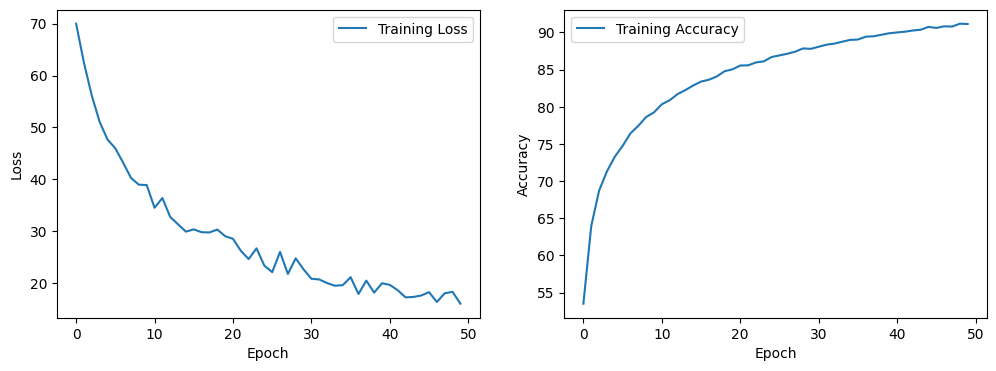

Test Accuracy : 84.07%


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.bn3(self.fc1(x)))
        x = self.fc2(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_loss_history = []
train_accuracy_history = []

for epoch in range(50):

    running_loss = 0.0
    correct = 0
    total = 0

    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f"[{epoch + 1} - {i + 1}] training loss : {running_loss / 100:.3f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_loss_history.append(running_loss)
    train_accuracy_history.append(train_accuracy)

    print(f"Epoch {epoch + 1} - Training Loss : {train_loss_history[-1]:.3f}, Training Accuracy : {train_accuracy:.2f}%")

def plot_loss_and_accuracy(train_loss, train_accuracy):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label="Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Plot training loss and accuracy curves
plot_loss_and_accuracy(train_loss_history, train_accuracy_history)

# Test the model on the test dataset for evaluation
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy : {test_accuracy:.2f}%")

Complex Model Initial Training

[1 - 100] training loss : 2.111
[1 - 200] training loss : 1.800
[1 - 300] training loss : 1.628
[1 - 400] training loss : 1.548
[1 - 500] training loss : 1.519
[1 - 600] training loss : 1.491
[1 - 700] training loss : 1.429
[1 - 800] training loss : 1.351
[1 - 900] training loss : 1.333
[1 - 1000] training loss : 1.294
[1 - 1100] training loss : 1.272
[1 - 1200] training loss : 1.224
[1 - 1300] training loss : 1.197
[1 - 1400] training loss : 1.228
[1 - 1500] training loss : 1.149
Epoch 1 - Training Loss : 70.836, Training Accuracy : 48.07%
[2 - 100] training loss : 1.114
[2 - 200] training loss : 1.105
[2 - 300] training loss : 1.039
[2 - 400] training loss : 1.041
[2 - 500] training loss : 1.012
[2 - 600] training loss : 0.985
[2 - 700] training loss : 0.977
[2 - 800] training loss : 1.007
[2 - 900] training loss : 0.987
[2 - 1000] training loss : 0.937
[2 - 1100] training loss : 0.951
[2 - 1200] training loss : 0.934
[2 - 1300] training loss : 0.919
[2 - 1400] training loss : 0.915


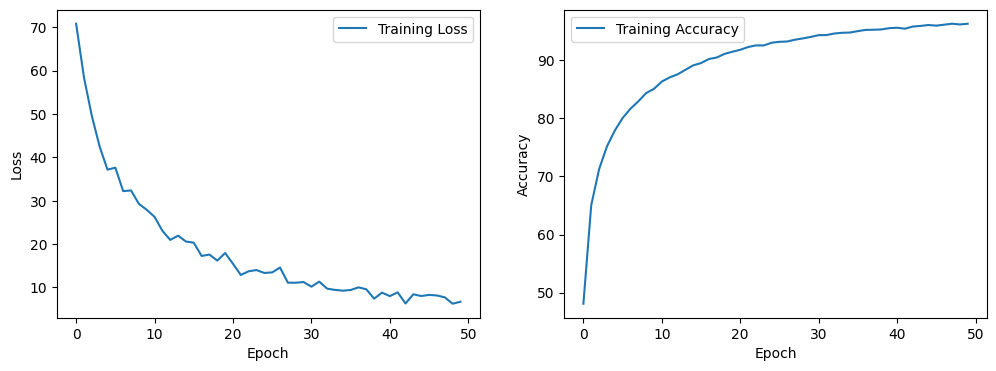

Test Accuracy : 87.64%


In [12]:
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn3(self.conv3(x)))
        x = torch.relu(self.bn4(self.conv4(x)))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = ComplexNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_loss_history = []
train_accuracy_history = []

for epoch in range(50):

    running_loss = 0.0
    correct = 0
    total = 0

    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f"[{epoch + 1} - {i + 1}] training loss : {running_loss / 100:.3f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_loss_history.append(running_loss)
    train_accuracy_history.append(train_accuracy)

    print(f"Epoch {epoch + 1} - Training Loss : {train_loss_history[-1]:.3f}, Training Accuracy : {train_accuracy:.2f}%")

# Plot training loss and accuracy curves
plot_loss_and_accuracy(train_loss_history, train_accuracy_history)

# Test the model on the test dataset for evaluation
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy : {test_accuracy:.2f}%")

Hyperparameter Tuning on the Complex Model

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

def create_model(learning_rate, num_epochs, batch_size, trainloader, valloader):

    class CNNModel(nn.Module):
        def __init__(self):
            super(ComplexNet, self).__init__()
            self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
            self.bn1 = nn.BatchNorm2d(64)
            self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
            self.bn2 = nn.BatchNorm2d(128)
            self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
            self.bn3 = nn.BatchNorm2d(256)
            self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
            self.bn4 = nn.BatchNorm2d(256)
            self.fc1 = nn.Linear(256 * 4 * 4, 512)
            self.fc2 = nn.Linear(512, 10)

        def forward(self, x):
            x = torch.relu(self.bn1(self.conv1(x)))
            x = torch.max_pool2d(x, 2)
            x = torch.relu(self.bn2(self.conv2(x)))
            x = torch.max_pool2d(x, 2)
            x = torch.relu(self.bn3(self.conv3(x)))
            x = torch.relu(self.bn4(self.conv4(x)))
            x = torch.max_pool2d(x, 2)
            x = x.view(x.size(0), -1)
            x = torch.relu(self.fc1(x))
            x = self.fc2(x)
            return x

    net = CNNModel()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loss_history = []
    train_accuracy_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        net.train()
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if i % 100 == 99:
                print(f"[{epoch + 1}, {i + 1}] training loss: {running_loss / 100:.3f}")
                running_loss = 0.0

        train_accuracy = 100 * correct / total
        train_loss_history.append(running_loss)
        train_accuracy_history.append(train_accuracy)

    return net, train_loss_history, train_accuracy_history

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

def hyperparameter_tuning():
    learning_rates = [0.001, 0.01, 0.1]
    num_epochs_list = [5, 10, 15]
    batch_sizes = [32, 64, 128]

    best_model = None
    best_val_accuracy = 0.0
    best_hyperparameters = {}

    for learning_rate in learning_rates:
        for num_epochs in num_epochs_list:
            for batch_size in batch_sizes:
                print(f"Training model with learning rate {learning_rate}, num_epochs {num_epochs}, and batch size {batch_size}")
                
                transform = transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(32, padding=4),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                ])
                
                trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
                valset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
                
                train_size = int(0.8 * len(trainset))
                val_size = len(trainset) - train_size
                trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])
                
                trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
                valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)
                
                model, train_loss, train_acc = create_model(learning_rate, num_epochs, batch_size, trainloader, valloader)
                
                val_accuracy = evaluate_model(model, valloader)
                
                if val_accuracy > best_val_accuracy:
                    best_model = model
                    best_val_accuracy = val_accuracy
                    best_hyperparameters = {
                        'learning_rate': learning_rate,
                        'num_epochs': num_epochs,
                        'batch_size': batch_size
                    }

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=best_hyperparameters['batch_size'], shuffle=False, num_workers=2)
    
    test_accuracy = evaluate_model(best_model, testloader)
    
    print(f"Best Hyperparameters : {best_hyperparameters}")
    print(f"Best Validation Accuracy : {best_val_accuracy:.2f}%")
    print(f"Test Accuracy using Best Model : {test_accuracy:.2f}%")

hyperparameter_tuning()

Training model with learning rate 0.001, num_epochs 5, and batch size 32
Files already downloaded and verified
Files already downloaded and verified
[1, 100] training loss: 1.859
[1, 200] training loss: 1.575
[1, 300] training loss: 1.528
[1, 400] training loss: 1.430
[1, 500] training loss: 1.391
[1, 600] training loss: 1.293
[1, 700] training loss: 1.254
[1, 800] training loss: 1.266
[1, 900] training loss: 1.219
[1, 1000] training loss: 1.174
[1, 1100] training loss: 1.192
[1, 1200] training loss: 1.163
[2, 100] training loss: 1.122
[2, 200] training loss: 1.100
[2, 300] training loss: 1.065
[2, 400] training loss: 1.108
[2, 500] training loss: 1.075
[2, 600] training loss: 1.057
[2, 700] training loss: 1.040
[2, 800] training loss: 1.056
[2, 900] training loss: 1.057
[2, 1000] training loss: 1.047
[2, 1100] training loss: 1.048
[2, 1200] training loss: 0.991
[3, 100] training loss: 0.974
[3, 200] training loss: 0.968
[3, 300] training loss: 0.964
[3, 400] training loss: 0.959
[3, 5

Final Model Training with Optimized Hyperparameters

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
[1 - 100] Training Loss: 2.182
[1 - 200] Training Loss: 1.761
[1 - 300] Training Loss: 1.643
[1 - 400] Training Loss: 1.553
[1 - 500] Training Loss: 1.496
[1 - 600] Training Loss: 1.483
[1 - 700] Training Loss: 1.404
[1 - 800] Training Loss: 1.395
[1 - 900] Training Loss: 1.340
[1 - 1000] Training Loss: 1.317
[1 - 1100] Training Loss: 1.245
[1 - 1200] Training Loss: 1.262
[1 - 1300] Training Loss: 1.258
[1 - 1400] Training Loss: 1.199
[1 - 1500] Training Loss: 1.184
Epoch 1 - Validation Loss: 393.009, Validation Accuracy: 54.86%
[2 - 100] Training Loss: 1.111
[2 - 200] Training Loss: 1.106
[2 - 300] Training Loss: 1.107
[2 - 400] Training Loss: 1.029
[2 - 500] Training Loss: 1.059
[2 - 600] Training Loss: 1.044
[2 - 700] Training Loss: 1.009
[2 - 800] Training Loss: 1.024
[2 - 900] Training Loss: 0.990
[2 - 1000] Training Loss: 0.987
[2 - 1100] Training Loss: 0.973
[2 - 120

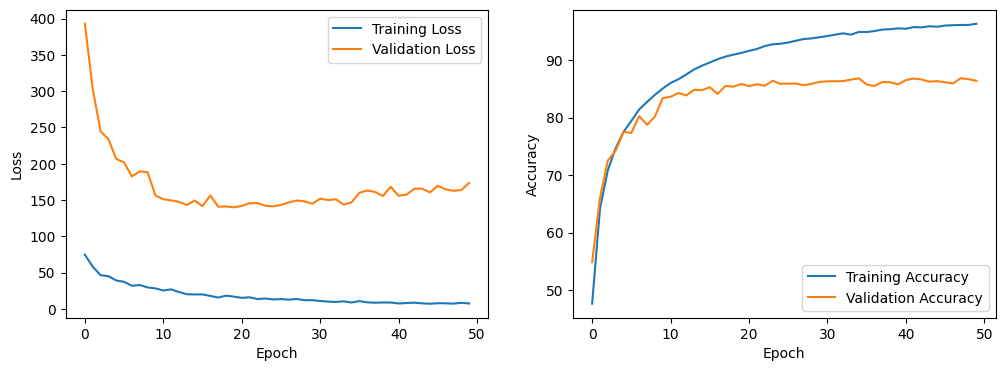

Test Accuracy : 86.75%


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32

# Load the training, validation, and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Validation dataset and data loader
valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
valloader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)

class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn3(self.conv3(x)))
        x = torch.relu(self.bn4(self.conv4(x)))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = ComplexNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

for epoch in range(50):

    running_loss = 0.0
    correct = 0
    total = 0

    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:
            print(f"[{epoch + 1} - {i + 1}] Training Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_loss_history.append(running_loss)
    train_accuracy_history.append(train_accuracy)

    net.eval()
    val_correct = 0
    val_total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in valloader:
            val_images, val_labels = data
            val_outputs = net(val_images)
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    val_accuracy = 100 * val_correct / val_total
    val_loss_history.append(val_running_loss)
    val_accuracy_history.append(val_accuracy)

    print(f"Epoch {epoch + 1} - Validation Loss: {val_loss_history[-1]:.3f}, Validation Accuracy: {val_accuracy:.2f}%")

# Plot training and validation loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Test the model on the test dataset for evaluation
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy : {test_accuracy:.2f}%")

Training known image classification models with CIFAR-10 data set and testing accuracy.

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define a transform to preprocess the CIFAR-10 images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading CIFAR-10 data set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

def train_model(model, trainloader, optimizer, criterion, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1):.4f}")

    print("Model training finished")

def evaluate_model(model):

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f"Test Accuracy : {test_accuracy:.2f}%")

Files already downloaded and verified
Files already downloaded and verified


In [22]:
# Load the pre-trained AlexNet model
model_alexnet = torchvision.models.alexnet(weights='DEFAULT')

# Modify the final fully connected layer to match the number of classes in CIFAR-10
num_classes = 10
model_alexnet.classifier[6] = nn.Linear(4096, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_alexnet.parameters(), lr=0.001)

# Train the model using the training data set
train_model(model_alexnet, trainloader, optimizer, criterion, num_epochs=3)

# Test the model using the test data set
evaluate_model(model_alexnet)

Epoch 1, Loss: 2.3060
Epoch 2, Loss: 2.3034
Epoch 3, Loss: 2.3033
Model training finished
Test Accuracy : 10.00%


In [23]:
# Load the pre-trained ResNet-18 model
model_resnet18 = torchvision.models.resnet18()

# Modify the final fully connected layer to match the number of classes in CIFAR-10
num_classes = 10
model_resnet18.fc = nn.Linear(512, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet18.parameters(), lr=0.001)

# Train the model using the training data set
train_model(model_resnet18, trainloader, optimizer, criterion, num_epochs=3)

# Test the model using the test data set
evaluate_model(model_resnet18)

Epoch 1, Loss: 1.3394
Epoch 2, Loss: 0.8089
Epoch 3, Loss: 0.6095
Model training finished
Test Accuracy : 79.78%
